# 2. The Simple Regression Model


In [1]:
%pip install matplotlib numpy pandas seaborn statsmodels wooldridge scipy -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import wooldridge as wool
from scipy import stats

sns.set_theme(style="darkgrid")

## 2.1 Simple OLS Regression


$$ y = \beta_0 + \beta_1 x + u $$

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$

$$\hat{\beta}_1 = \frac{\text{cov}(x,y)}{\text{var}(x)}$$

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x$$


### Example 2.3: CEO Salary and Return on Equity


$$ \text{salary} = \beta_0 + \beta_1 \text{roe} + u $$


In [3]:
ceosal1 = wool.data("ceosal1")
x = ceosal1["roe"]
y = ceosal1["salary"]

# ingredients to the OLS formulas:
cov_xy = np.cov(x, y)[1, 0]  # access 2. row and 1. column of covariance matrix
var_x = np.var(x, ddof=1)
x_bar = np.mean(x)
y_bar = np.mean(y)

# manual calculation of OLS coefficients:
b1 = cov_xy / var_x
b0 = y_bar - b1 * x_bar

print(f"b0: {b0}")
print(f"b1: {b1}")

b0: 963.1913364725576
b1: 18.501186345214933


$$\widehat{\text{salary}} = \hat{\beta}_0 + \hat{\beta}_1 \text{roe}$$


In [4]:
ceosal1 = wool.data("ceosal1")

reg = smf.ols(formula="salary ~ roe", data=ceosal1)
results = reg.fit()
b = results.params
print(f"b: \n{b}")

b: 
Intercept    963.191336
roe           18.501186
dtype: float64


In [5]:
def plot_regression(x, y, data, results, title):
    # scatter plot and fitted values:
    plt.plot(x, y, data=data, color="grey", marker="o", linestyle="")
    plt.plot(data[x], results.fittedvalues, color="black", linestyle="-")
    plt.ylabel(y)
    plt.xlabel(x)
    plt.title(title)
    plt.savefig(title + ".pdf")

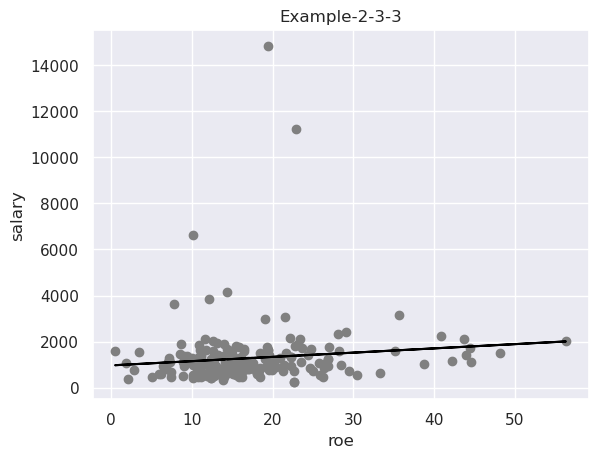

In [6]:
ceosal1 = wool.data("ceosal1")

# OLS regression:
reg = smf.ols(formula="salary ~ roe", data=ceosal1)
results = reg.fit()

plot_regression("roe", "salary", ceosal1, results, "Example-2-3-3")

### Example 2.4: Wage and Education


$$\text{wage} = \beta_0 + \beta_1 \text{educ} + u$$


In [7]:
wage1 = wool.data("wage1")

reg = smf.ols(formula="wage ~ educ", data=wage1)
results = reg.fit()
b = results.params
print(f"b: \n{b}")

b: 
Intercept   -0.904852
educ         0.541359
dtype: float64


$$\widehat{\text{wage}} = \hat{\beta}_0 + \hat{\beta}_1 \text{educ}$$


### Example 2.5: Voting Outcomes and Campaign Expenditures


$$ \text{voteA} = \beta_0 + \beta_1 \text{shareA} + u $$

$$\widehat{\text{voteA}} = \hat{\beta}_0 + \hat{\beta}_1 \text{shareA}$$


In [8]:
vote1 = wool.data("vote1")

# OLS regression:
reg = smf.ols(formula="voteA ~ shareA", data=vote1)
results = reg.fit()
b = results.params
print(f"b: \n{b}")

b: 
Intercept    26.812214
shareA        0.463827
dtype: float64


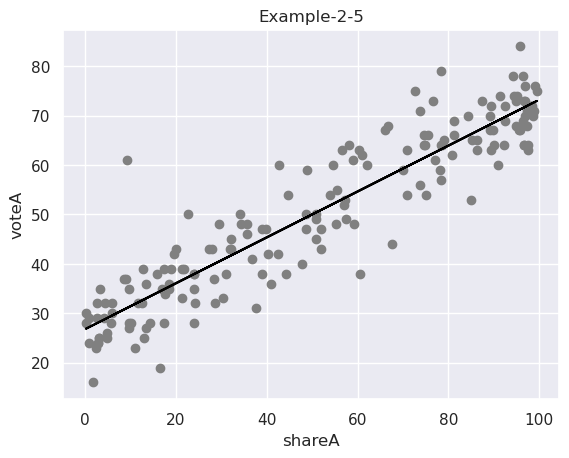

In [9]:
plot_regression("shareA", "voteA", vote1, results, "Example-2-5")

## 2.2. Coefficients, Fitted Values, and Residuals


$$\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$$

$$\hat{u}_i = y_i - \hat{y}_i$$


### Example 2.6: CEO Salary and Return on Equity


In [10]:
ceosal1 = wool.data("ceosal1")

# OLS regression:
reg = smf.ols(formula="salary ~ roe", data=ceosal1)
results = reg.fit()

# obtain predicted values and residuals:
salary_hat = results.fittedvalues
u_hat = results.resid

# Wooldridge, Table 2.2:
table = pd.DataFrame(
    {
        "roe": ceosal1["roe"],
        "salary": ceosal1["salary"],
        "salary_hat": salary_hat,
        "u_hat": u_hat,
    },
)
print(f"table.head(15): \n{table.head(15)}")

table.head(15): 
          roe  salary   salary_hat       u_hat
0   14.100000    1095  1224.058071 -129.058071
1   10.900000    1001  1164.854261 -163.854261
2   23.500000    1122  1397.969216 -275.969216
3    5.900000     578  1072.348338 -494.348338
4   13.800000    1368  1218.507712  149.492288
5   20.000000    1145  1333.215063 -188.215063
6   16.400000    1078  1266.610785 -188.610785
7   16.299999    1094  1264.760660 -170.760660
8   10.500000    1237  1157.453793   79.546207
9   26.299999     833  1449.772523 -616.772523
10  25.900000     567  1442.372056 -875.372056
11  26.799999     933  1459.023116 -526.023116
12  14.800000    1339  1237.008898  101.991102
13  22.299999     937  1375.767778 -438.767778
14  56.299999    2011  2004.808114    6.191886


### Example 2.7: Wage and Education


$$\sum_{i=1}^n \hat{u}_i = 0 \qquad \Rightarrow \qquad \bar{\hat{u}}_i = 0$$

$$\sum_{i=1}^n x_i \hat{u}_i = 0 \qquad \Rightarrow \qquad \text{cov}(x_i, \hat{u}_i) = 0$$

$$\bar{y} = \hat{\beta}_0 + \hat{\beta}_1 \bar{x}$$


In [11]:
wage1 = wool.data("wage1")
reg = smf.ols(formula="wage ~ educ", data=wage1)
results = reg.fit()

# obtain coefficients, predicted values and residuals:
b = results.params
wage_hat = results.fittedvalues
u_hat = results.resid

# confirm property (1):
u_hat_mean = np.mean(u_hat)
print(f"u_hat_mean: {u_hat_mean}")

# confirm property (2):
educ_u_cov = np.cov(wage1["educ"], u_hat)[1, 0]
print(f"educ_u_cov: {educ_u_cov}")

# confirm property (3):
educ_mean = np.mean(wage1["educ"])
wage_pred = b.iloc[0] + b.iloc[1] * educ_mean
print(f"wage_pred: {wage_pred}")

wage_mean = np.mean(wage1["wage"])
print(f"wage_mean: {wage_mean}")

u_hat_mean: -7.618747204728071e-15
educ_u_cov: -2.1992989440193578e-15
wage_pred: 5.896102674787043
wage_mean: 5.896102674787035


## 2.3. Goodness of Fit


$$\text{var}(x) = \frac{1}{n-1} \sum_{i=1}^n (x_i - \bar{x})^2$$

$$\text{SST} = \sum_{i=1}^n (y_i - \bar{y})^2 = (n-1) \text{var}(y)$$

$$\text{SSE} = \sum_{i=1}^n (\hat{y}_i - \bar{y})^2 = (n-1) \text{var}(\hat{y})$$

$$\text{SSR} = \sum_{i=1}^n (\hat{u}_i - 0)^2 = (n-1) \text{var}(\hat{u})$$

$$R^2 = \frac{\text{var}(\hat{y})}{\text{var}(y)} = 1 - \frac{\text{var}(\hat{u})}{\text{var}(y)}$$


### Example 2.8: CEO Salary and Return on Equity


In [12]:
ceosal1 = wool.data("ceosal1")

# OLS regression:
reg = smf.ols(formula="salary ~ roe", data=ceosal1)
results = reg.fit()

# calculate predicted values & residuals:
sal_hat = results.fittedvalues
u_hat = results.resid

# calculate R^2 in three different ways:
sal = ceosal1["salary"]
R2_a = np.var(sal_hat, ddof=1) / np.var(sal, ddof=1)
R2_b = 1 - np.var(u_hat, ddof=1) / np.var(sal, ddof=1)
R2_c = np.corrcoef(sal, sal_hat)[1, 0] ** 2

print(f"R2_a: {R2_a}")
print(f"R2_b: {R2_b}")
print(f"R2_c: {R2_c}")

R2_a: 0.013188624081034115
R2_b: 0.01318862408103405
R2_c: 0.013188624081034085


### Example 2.9: Voting Outcomes and Campaign Expenditures


In [13]:
vote1 = wool.data("vote1")

# OLS regression:
reg = smf.ols(formula="voteA ~ shareA", data=vote1)
results = reg.fit()

# print results using summary:
print(f"results.summary(): \n{results.summary()}")

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  voteA   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1018.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           6.63e-74
Time:                        16:45:54   Log-Likelihood:                -565.20
No. Observations:                 173   AIC:                             1134.
Df Residuals:                     171   BIC:                             1141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.8122      0.887

In [14]:
# print regression table:
table = pd.DataFrame(
    {
        "b": round(results.params, 4),
        "se": round(results.bse, 4),
        "t": round(results.tvalues, 4),
        "pval": round(results.pvalues, 4),
    },
)
print(f"table: \n{table}")

table: 
                 b      se        t  pval
Intercept  26.8122  0.8872  30.2207   0.0
shareA      0.4638  0.0145  31.9008   0.0


## 2.4 Nonlinearities

### Example 2.10: Wage and Education


In [15]:
wage1 = wool.data("wage1")

# estimate log-level model:
reg = smf.ols(formula="np.log(wage) ~ educ", data=wage1)
results = reg.fit()
b = results.params
print(f"b: \n{b}")

b: 
Intercept    0.583773
educ         0.082744
dtype: float64


### Example 2.11: CEO Salary and Firm Sales


In [16]:
ceosal1 = wool.data("ceosal1")

# estimate log-log model:
reg = smf.ols(formula="np.log(salary) ~ np.log(sales)", data=ceosal1)
results = reg.fit()
b = results.params
print(f"b: \n{b}")

b: 
Intercept        4.821996
np.log(sales)    0.256672
dtype: float64


## 2.5. Regression through the Origin and Regression on a Constant


In [17]:
ceosal1 = wool.data("ceosal1")

# usual OLS regression:
reg1 = smf.ols(formula="salary ~ roe", data=ceosal1)
results1 = reg1.fit()
b_1 = results1.params
print(f"b_1: \n{b_1}")

# regression without intercept (through origin):
reg2 = smf.ols(formula="salary ~ 0 + roe", data=ceosal1)
results2 = reg2.fit()
b_2 = results2.params
print(f"b_2: \n{b_2}")

# regression without slope (on a constant):
reg3 = smf.ols(formula="salary ~ 1", data=ceosal1)
results3 = reg3.fit()
b_3 = results3.params
print(f"b_3: \n{b_3}")

# average y:
sal_mean = np.mean(ceosal1["salary"])
print(f"sal_mean: {sal_mean}")

b_1: 
Intercept    963.191336
roe           18.501186
dtype: float64
b_2: 
roe    63.537955
dtype: float64
b_3: 
Intercept    1281.119617
dtype: float64
sal_mean: 1281.1196172248804


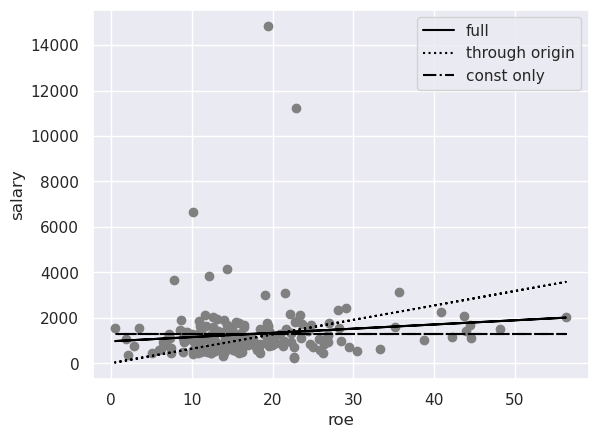

In [18]:
# scatter plot and fitted values:
plt.plot(
    "roe",
    "salary",
    data=ceosal1,
    color="grey",
    marker="o",
    linestyle="",
    label="",
)
plt.plot(
    ceosal1["roe"],
    results1.fittedvalues,
    color="black",
    linestyle="-",
    label="full",
)
plt.plot(
    ceosal1["roe"],
    results2.fittedvalues,
    color="black",
    linestyle=":",
    label="through origin",
)
plt.plot(
    ceosal1["roe"],
    results3.fittedvalues,
    color="black",
    linestyle="-.",
    label="const only",
)
plt.ylabel("salary")
plt.xlabel("roe")
plt.legend()
plt.savefig("SLR-Origin-Const.pdf")

## 2.6. Expected Values, Variances, and Standard Errors


- **SLR.1**: Linear population regression function: $y = \beta_0 + \beta_1 x + u$
- **SLR.2**: Random sampling of x and y from the population
- **SLR.3**: Variation in the sample values $x_1, ..., x_n$
- **SLR.4**: Zero conditional mean: $\text{E}(u|x) = 0$
- **SLR.5**: Homoscedasticity: $\text{var}(u|x) = \sigma^2$


- **Theorem 2.1**: Under SLR.1 – SLR.4, OLS parameter estimators are unbiased.
- **Theorem 2.2**: Under SLR.1 – SLR.5, OLS parameter estimators have a specific sampling variance.


$$\hat{\sigma}^2 = \frac{1}{n-2} \cdot \sum_{i=1}^n \hat{u}_i^2 = \frac{n-1}{n-2} \cdot \text{var}(\hat{u}_i)$$

$$\text{sd}(x) = \sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$$

$$\text{se}\left(\hat{\beta}_0\right) = \sqrt{\frac{\hat{\sigma}^2 \bar{x^2}}{\sum_{i=1}^n (x_i - \bar{x})^2}} = \frac{1}{\sqrt{n-1}} \cdot \frac{\hat{\sigma}}{\text{sd}(x)} \cdot \sqrt{\bar{x^2}}$$

$$\text{se}\left(\hat{\beta}_1\right) = \sqrt{\frac{\hat{\sigma}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}} = \frac{1}{\sqrt{n-1}} \cdot \frac{\hat{\sigma}}{\text{sd}(x)}$$


### Example 2.12: Student Math Performance and the School Lunch Program


In [19]:
meap93 = wool.data("meap93")

# estimate the model and save the results as "results":
reg = smf.ols(formula="math10 ~ lnchprg", data=meap93)
results = reg.fit()

# number of obs.:
n = results.nobs

# SER:
u_hat_var = np.var(results.resid, ddof=1)
SER = np.sqrt(u_hat_var) * np.sqrt((n - 1) / (n - 2))
print(f"SER: {SER}")

# SE of b0 & b1, respectively:
lnchprg_sq_mean = np.mean(meap93["lnchprg"] ** 2)
lnchprg_var = np.var(meap93["lnchprg"], ddof=1)
b1_se = SER / (np.sqrt(lnchprg_var) * np.sqrt(n - 1)) * np.sqrt(lnchprg_sq_mean)
b0_se = SER / (np.sqrt(lnchprg_var) * np.sqrt(n - 1))
print(f"b1_se: {b1_se}")
print(f"b0_se: {b0_se}")

SER: 9.565938459482759
b1_se: 0.9975823856755018
b0_se: 0.034839334258369624


In [20]:
# automatic calculations:
print(f"results.summary(): \n{results.summary()}")

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                 math10   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     83.77
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.75e-18
Time:                        16:45:55   Log-Likelihood:                -1499.3
No. Observations:                 408   AIC:                             3003.
Df Residuals:                     406   BIC:                             3011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.1427      0.998

## 2.7 Monte Carlo Simulations

### 2.7.1. One Sample


In [21]:
# set the random seed:
np.random.seed(1234567)

# set sample size:
n = 1000

# set true parameters (betas and sd of u):
beta0 = 1
beta1 = 0.5
su = 2

# draw a sample of size n:
x = stats.norm.rvs(4, 1, size=n)
u = stats.norm.rvs(0, su, size=n)
y = beta0 + beta1 * x + u
df = pd.DataFrame({"y": y, "x": x})

# estimate parameters by OLS:
reg = smf.ols(formula="y ~ x", data=df)
results = reg.fit()
b = results.params
print(f"b: {b}")

# features of the sample for the variance formula:
x_sq_mean = np.mean(x**2)
print(f"x_sq_mean: {x_sq_mean}")
x_var = np.sum((x - np.mean(x)) ** 2)
print(f"x_var: {x_var}")

b: Intercept    1.190238
x            0.444255
dtype: float64
x_sq_mean: 17.27675304867723
x_var: 953.7353266586754


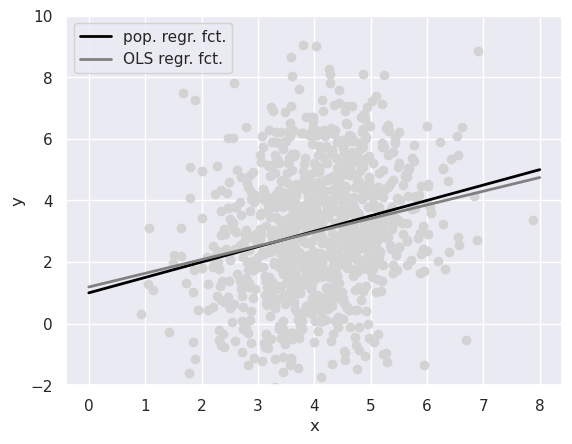

In [22]:
# graph:
x_range = np.linspace(0, 8, num=100)
plt.ylim([-2, 10])
plt.plot(x, y, color="lightgrey", marker="o", linestyle="")
plt.plot(
    x_range,
    beta0 + beta1 * x_range,
    color="black",
    linestyle="-",
    linewidth=2,
    label="pop. regr. fct.",
)
plt.plot(
    x_range,
    b.iloc[0] + b.iloc[1] * x_range,
    color="grey",
    linestyle="-",
    linewidth=2,
    label="OLS regr. fct.",
)
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.savefig("SLR-Sim-Sample.pdf")

### 2.7.2. Many Samples


In [23]:
# set the random seed:
np.random.seed(1234567)

# set sample size and number of simulations:
n = 1000
r = 10000

# set true parameters (betas and sd of u):
beta0 = 1
beta1 = 0.5
su = 2

# initialize b0 and b1 to store results later:
b0 = np.empty(r)
b1 = np.empty(r)

# draw a sample of x, fixed over replications:
x = stats.norm.rvs(4, 1, size=n)

# repeat r times:
for i in range(r):
    # draw a sample of y:
    u = stats.norm.rvs(0, su, size=n)
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({"y": y, "x": x})

    # estimate and store parameters by OLS:
    reg = smf.ols(formula="y ~ x", data=df)
    results = reg.fit()
    b0[i] = results.params["Intercept"]
    b1[i] = results.params["x"]

# MC estimate of the expected values:
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f"b0_mean: {b0_mean}")
print(f"b1_mean: {b1_mean}")

# MC estimate of the variances:
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f"b0_var: {b0_var}")
print(f"b1_var: {b1_var}")

b0_mean: 1.00329460319241
b1_mean: 0.49936958775965984
b0_var: 0.07158103946245628
b1_var: 0.004157652196227234


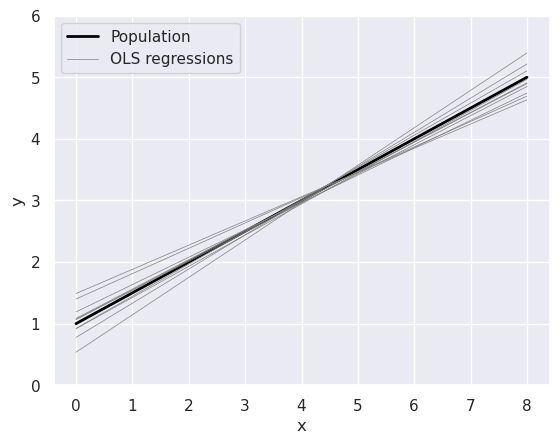

In [24]:
# graph:
x_range = np.linspace(0, 8, num=100)
plt.ylim([0, 6])

# add population regression line:
plt.plot(
    x_range,
    beta0 + beta1 * x_range,
    color="black",
    linestyle="-",
    linewidth=2,
    label="Population",
)

# add first OLS regression line (to attach a label):
plt.plot(
    x_range,
    b0[0] + b1[0] * x_range,
    color="grey",
    linestyle="-",
    linewidth=0.5,
    label="OLS regressions",
)

# add OLS regression lines no. 2 to 10:
for i in range(1, 10):
    plt.plot(
        x_range,
        b0[i] + b1[i] * x_range,
        color="grey",
        linestyle="-",
        linewidth=0.5,
    )
plt.ylabel("y")
plt.xlabel("x")
plt.legend()
plt.savefig("SLR-Sim-Model-Condx.pdf")

### 2.7.3. Violation of SLR.4


$$\text{E}(u | x) = \frac{x - 4}{5}$$


In [25]:
# set the random seed:
np.random.seed(1234567)

# set sample size and number of simulations:
n = 1000
r = 10000

# set true parameters (betas and sd of u):
beta0 = 1
beta1 = 0.5
su = 2

# initialize b0 and b1 to store results later:
b0 = np.empty(r)
b1 = np.empty(r)

# draw a sample of x, fixed over replications:
x = stats.norm.rvs(4, 1, size=n)

# repeat r times:
for i in range(r):
    # draw a sample of y:
    u_mean = np.array((x - 4) / 5)
    u = stats.norm.rvs(u_mean, su, size=n)
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({"y": y, "x": x})

    # estimate and store parameters by OLS:
    reg = smf.ols(formula="y ~ x", data=df)
    results = reg.fit()
    b0[i] = results.params["Intercept"]
    b1[i] = results.params["x"]

# MC estimate of the expected values:
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f"b0_mean: {b0_mean}")
print(f"b1_mean: {b1_mean}")

# MC estimate of the variances:
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f"b0_var: {b0_var}")
print(f"b1_var: {b1_var}")

b0_mean: 0.2032946031924096
b1_mean: 0.6993695877596598
b0_var: 0.07158103946245628
b1_var: 0.004157652196227234


### 2.7.4. Violation of SLR.5


$$\text{var}(u | x) = \frac{4}{e^{4.5}} e^x$$


In [26]:
# set the random seed:
np.random.seed(1234567)

# set sample size and number of simulations:
n = 1000
r = 10000

# set true parameters (betas):
beta0 = 1
beta1 = 0.5

# initialize b0 and b1 to store results later:
b0 = np.empty(r)
b1 = np.empty(r)

# draw a sample of x, fixed over replications:
x = stats.norm.rvs(4, 1, size=n)

# repeat r times:
for i in range(r):
    # draw a sample of y:
    u_var = np.array(4 / np.exp(4.5) * np.exp(x))
    u = stats.norm.rvs(0, np.sqrt(u_var), size=n)
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({"y": y, "x": x})

    # estimate and store parameters by OLS:
    reg = smf.ols(formula="y ~ x", data=df)
    results = reg.fit()
    results = reg.fit()
    b0[i] = results.params["Intercept"]
    b1[i] = results.params["x"]

# MC estimate of the expected values:
b0_mean = np.mean(b0)
b1_mean = np.mean(b1)

print(f"b0_mean: {b0_mean}")
print(f"b1_mean: {b1_mean}")

# MC estimate of the variances:
b0_var = np.var(b0, ddof=1)
b1_var = np.var(b1, ddof=1)

print(f"b0_var: {b0_var}")
print(f"b1_var: {b1_var}")

b0_mean: 1.001414297039418
b1_mean: 0.4997594115253497
b0_var: 0.13175544492656727
b1_var: 0.010016166348092534
